In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
data=pd.read_csv('Data_CHF_Zhao_2020_ATE.csv')
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [5]:
data.tail()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
1860,1861,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,1862,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,1863,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,1864,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9
1864,1865,Richenderfer,plate,1.01,2000,-0.0434,15.0,120.0,10,11.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1865 non-null   int64  
 1   author               1865 non-null   object 
 2   geometry             1865 non-null   object 
 3   pressure [MPa]       1865 non-null   float64
 4   mass_flux [kg/m2-s]  1865 non-null   int64  
 5   x_e_out [-]          1865 non-null   float64
 6   D_e [mm]             1865 non-null   float64
 7   D_h [mm]             1865 non-null   float64
 8   length [mm]          1865 non-null   int64  
 9   chf_exp [MW/m2]      1865 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 145.8+ KB


In [7]:
data.isnull().sum()

id                     0
author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [8]:
data.nunique()

id                     1865
author                   10
geometry                  3
pressure [MPa]          114
mass_flux [kg/m2-s]     578
x_e_out [-]            1360
D_e [mm]                 36
D_h [mm]                 41
length [mm]              54
chf_exp [MW/m2]         109
dtype: int64

In [9]:
data_small=data.drop(['id','author'],axis=1)
data_small.head()

,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [10]:
data_small.describe().T

,count,mean,std,min,25%,50%,75%,max
pressure [MPa],1865.0,10.010949,4.282715,0.1000,6.8900,10.3400,13.7900,20.680
mass_flux [kg/m2-s],1865.0,2862.647721,1656.412247,0.0000,1519.0000,2590.0000,3933.0000,7975.000
x_e_out [-],1865.0,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232
D_e [mm],1865.0,9.417212,6.333807,1.0000,5.6000,8.5000,11.1000,37.500
D_h [mm],1865.0,16.167721,21.182870,1.0000,5.6000,10.3000,15.2000,120.000
length [mm],1865.0,911.340483,726.718974,10.0000,432.0000,625.0000,1778.0000,3048.000
chf_exp [MW/m2],1865.0,3.854638,1.985535,0.8000,2.4000,3.5000,4.8000,19.300


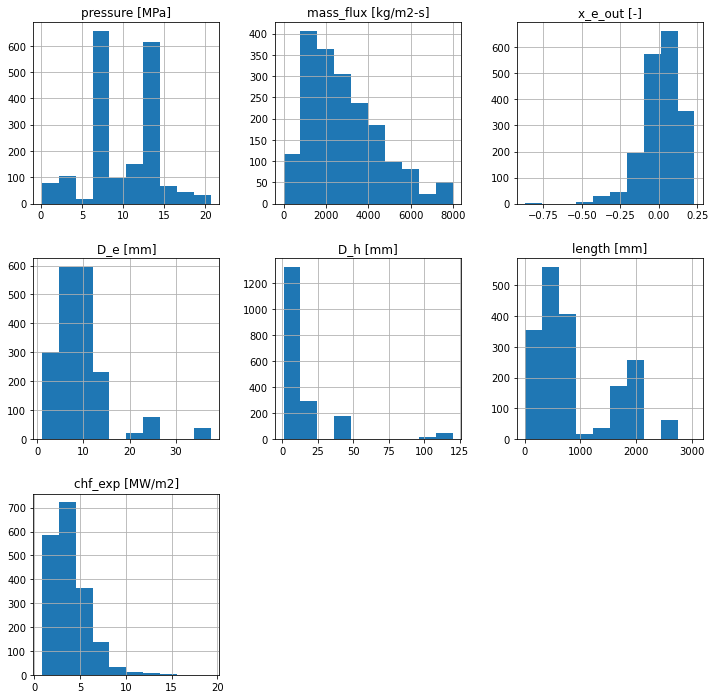

In [11]:
cols=['pressure [MPa]','mass_flux [kg/m2-s]','x_e_out [-]','D_e [mm]','D_h [mm]','length [mm]','chf_exp [MW/m2]']
data[cols].hist(figsize=(12,12))
plt.show()

In [12]:
def hist_box(col):
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(8,8))
    sns.set(style='darkgrid')
    sns.boxplot(data[col],ax=ax_box,showmeans=True)
    sns.histplot(data[col],ax=ax_hist)
    ax_hist.axvline(data[col].mean(),color='yellow',linestyle='--')
    ax_hist.axvline(data[col].median(),color='red',linestyle='-')
    plt.show()
    

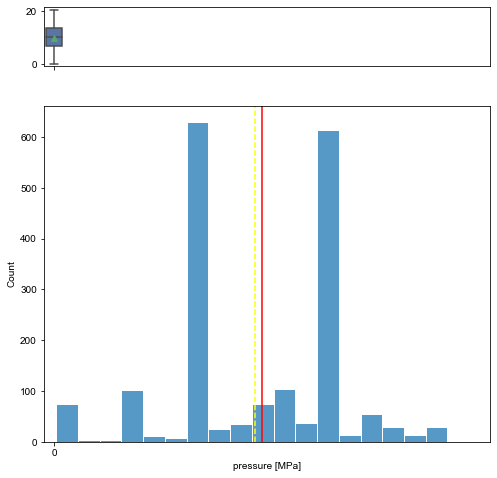

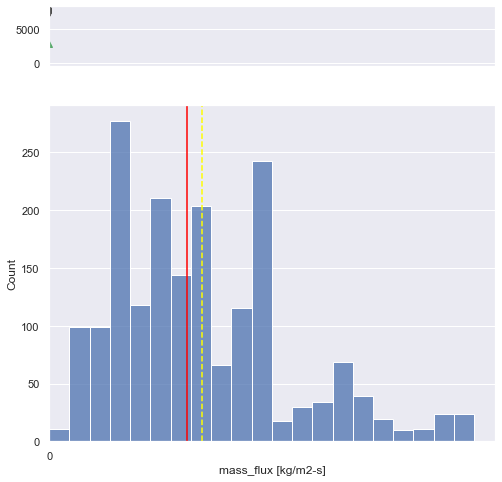

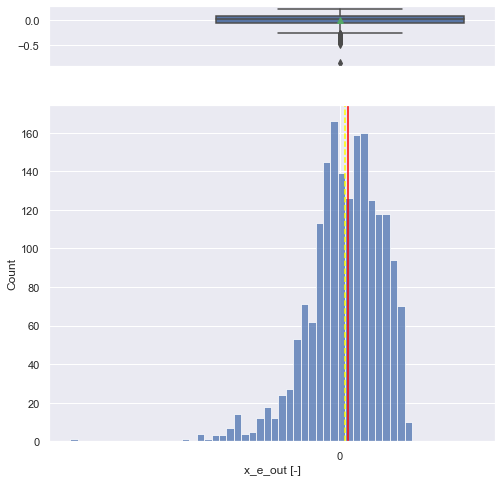

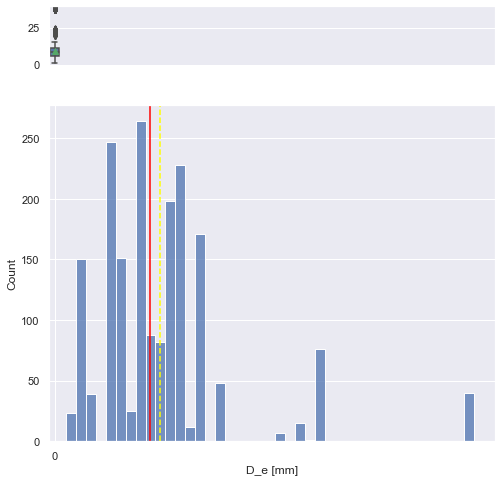

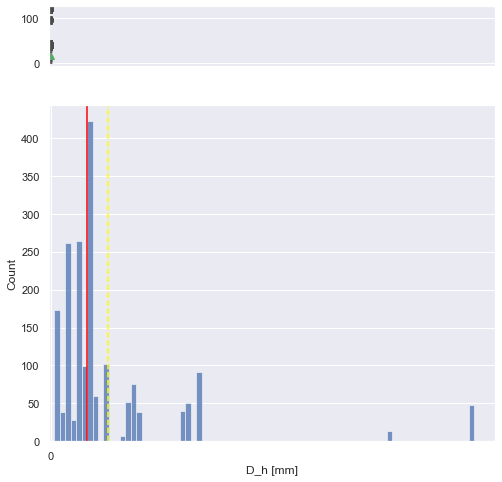

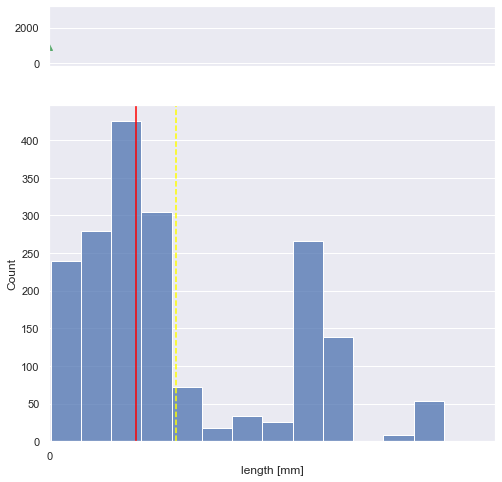

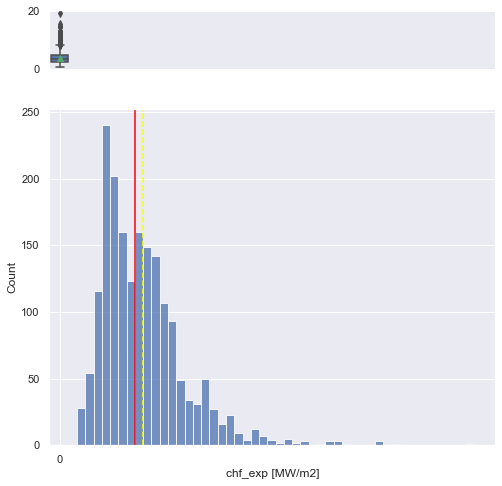

In [13]:
for i in cols:
    hist_box(i)

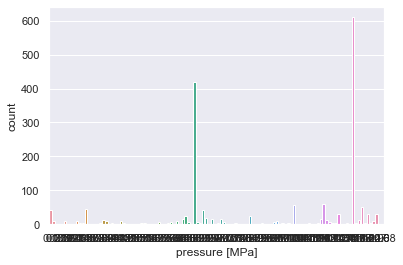

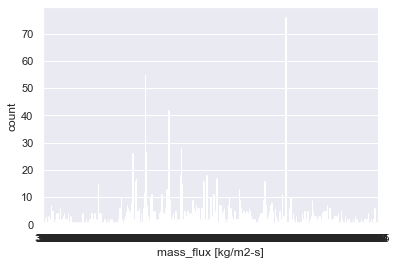

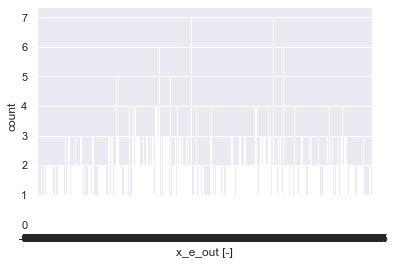

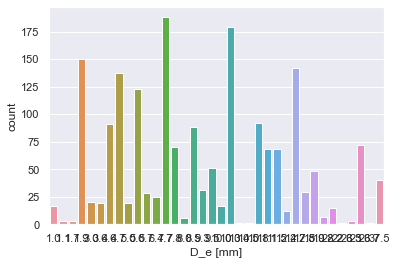

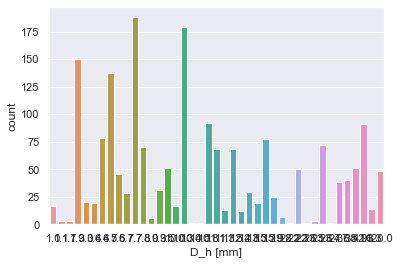

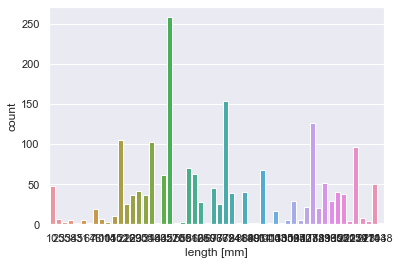

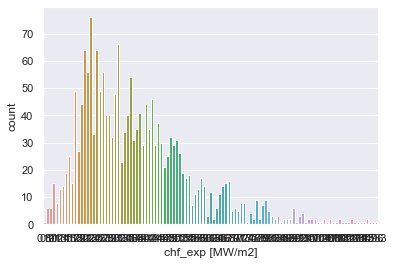

In [14]:
for i in cols:
    sns.countplot(x=data[i])
    plt.show()

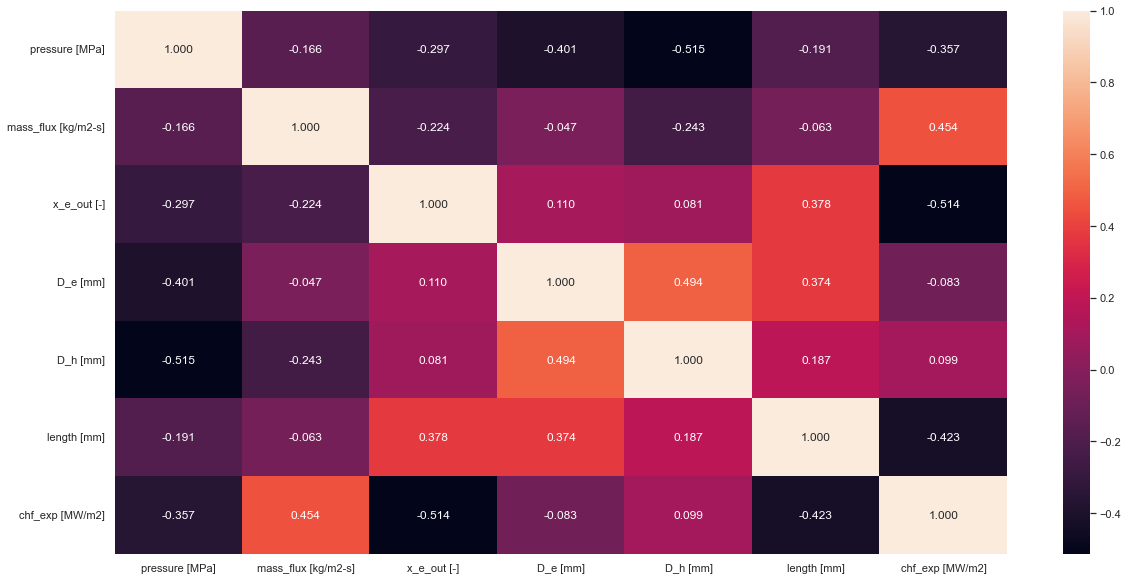

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data_small.corr(),annot=True,fmt='.3f')
plt.show()

In [21]:
data_small['geometry'].nunique()

3

In [22]:
data_small=data_small.sample(frac=1)
x=data_small.drop(['chf_exp [MW/m2]'],axis=1)
y=data_small[['chf_exp [MW/m2]']]

In [23]:
y.head()

,chf_exp [MW/m2]
1119,1.1
874,2.7
885,4.8
1271,3.6
603,5.8


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1,stratify=x['geometry'])
x_train.shape

(1678, 7)

In [25]:
x_train.columns

Index(['geometry', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]',
       'D_e [mm]', 'D_h [mm]', 'length [mm]'],
      dtype='object')

In [26]:
col_trans=ColumnTransformer([('geo', OneHotEncoder(),['geometry'])],remainder=StandardScaler())

In [27]:
model_xgb = Pipeline(steps=[('col_trans', col_trans),('regressor', XGBRegressor())])
model_xgb.fit(x_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('geo', OneHotEncoder(),
                                                  ['geometry'])])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [28]:
train_xgb_cv = cross_validate(model_xgb,x_train,y_train, scoring='neg_root_mean_squared_error',cv=10, return_estimator=True )

In [29]:
print('The RMSE for XGB Regressor on train data: %.3f'%train_xgb_cv['test_score'].mean(),'with std. deviation: %.3f'%train_xgb_cv['test_score'].std())

The RMSE for XGB Regressor on train data: -0.626 with std. deviation: 0.154


In [30]:
y_pred=model_xgb.predict(x_test)

In [31]:
print('The RMSE for XGB Regressor on test data: %.3f'%mean_squared_error(y_test,y_pred,squared=False))

The RMSE for XGB Regressor on test data: 0.716


In [32]:
parameters = dict(
    regressor__n_estimators= [100,200,300,400],
    regressor__max_depth= range(1, 50),
    regressor__learning_rate=[0.1,0.2,0.3])
random_cv = RandomizedSearchCV(model_xgb,parameters,cv=15,scoring='neg_root_mean_squared_error',random_state=1,verbose=1)
random_cv.fit(x_train,y_train)
print('Train RMSE after tuning: %.3f'%random_cv.best_score_)
print('Best Parameters:\n',random_cv.best_params_)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Train RMSE after tuning: -0.534
Best Parameters:
 {'regressor__n_estimators': 400, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.2}


In [33]:
model = Pipeline(steps=[('col_trans', col_trans),('regressor', XGBRegressor(n_estimators= 300,max_depth=3,learning_rate=0.1,random_state=1))])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Best RMSE for test data: %.3f'%mean_squared_error(y_test,y_pred,squared=False))

Best RMSE for test data: 0.652


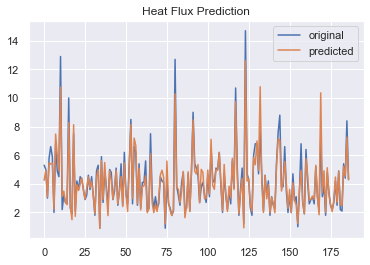

In [34]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Heat Flux Prediction")
plt.legend()
plt.show()
